In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ProjectI

## Ex1

In [2]:
# Convert image in grayscale
original1= cv.imread('object1.jpg')
gray_im1 = cv.cvtColor(original1, cv.COLOR_BGR2GRAY)

original2= cv.imread('object2.jpg')
gray_im2 = cv.cvtColor(original2, cv.COLOR_BGR2GRAY)

original3= cv.imread('object3.jpg')
gray_im3 = cv.cvtColor(original3, cv.COLOR_BGR2GRAY)

original4= cv.imread('object4.jpg')
gray_im4 = cv.cvtColor(original4, cv.COLOR_BGR2GRAY)

def correct_gama(gray_im): 
  plt.subplot(221)
  plt.title('Grayscale image')
  plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

  # Contrast adjusting with gamma correction y = 1.2

  gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
  plt.subplot(222)
  plt.title('Gamma Correction y= 1.2')
  plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
  # Contrast adjusting with histogramm equalization
  gray_equ = cv.equalizeHist(gray_im)
  plt.subplot(223)
  plt.title('Histogram equilization')
  plt.imshow(gray_equ, cmap="gray", vmin=0, vmax=255)
  return gray_correct

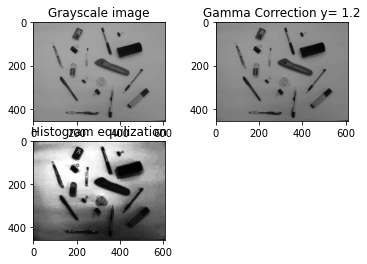

In [3]:
gray_correct1= correct_gama(gray_im1)

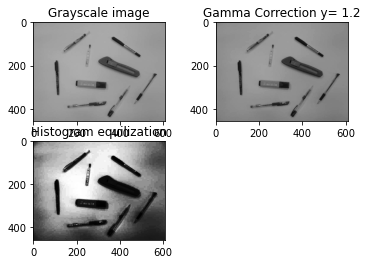

In [4]:
gray_correct2=correct_gama(gray_im2)

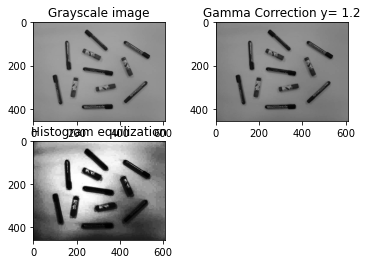

In [5]:
gray_correct3=correct_gama(gray_im3)

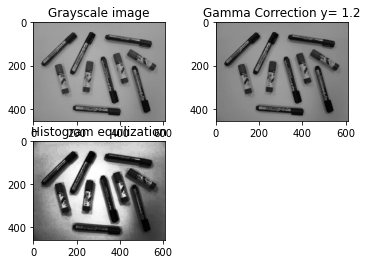

In [6]:
gray_correct4=correct_gama(gray_im4)

In [7]:
# Local adaptative threshold
def adaptative_threshold(gray_correct):
  thresh = cv.adaptiveThreshold(gray_correct, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 19)
  thresh = cv.bitwise_not(thresh)
  plt.subplot(221)
  plt.title('Local adapatative Threshold')
  plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
  return thresh

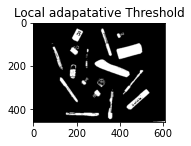

In [8]:
thresh1=adaptative_threshold(gray_correct1)

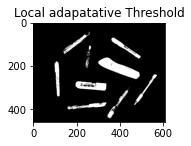

In [9]:
thresh2=adaptative_threshold(gray_correct2)

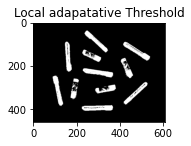

In [10]:
thresh3=adaptative_threshold(gray_correct3)

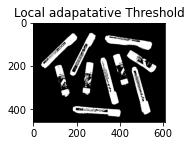

In [11]:
thresh4=adaptative_threshold(gray_correct4)

In [12]:
def dil_ero(thresh, num):
  # Dilatation et erosion
  kernel = np.ones((num,num), np.uint8)
  img_dilation = cv.dilate(thresh, kernel, iterations=1)
  img_erode = cv.erode(img_dilation,kernel, iterations=1)
  # clean all noise after dilatation and erosion
  img_erode = cv.medianBlur(img_erode, 7)
  plt.subplot(221)
  plt.title('Dilatation + erosion')
  plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
  return img_erode


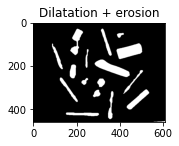

In [13]:
img_erode1=dil_ero(thresh1,23)

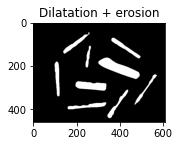

In [14]:
img_erode2=dil_ero(thresh2,17)

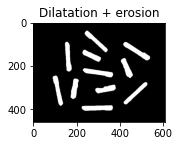

In [15]:
img_erode3=dil_ero(thresh3,17)

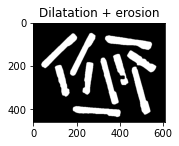

In [16]:
img_erode4=dil_ero(thresh4,17)

In [17]:
def count_object(img_erode):
  # Labeling
  ret, labels = cv.connectedComponents(img_erode,connectivity=4)
  label_hue = np.uint8(179 * labels / np.max(labels))
  blank_ch = 255 * np.ones_like(label_hue)
  labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
  labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
  labeled_img[label_hue == 0] = 0

  plt.subplot(222)
  plt.title('Objects counted:'+ str(ret-1))
  plt.imshow(labeled_img)
  print('objects number is:', ret-1)
  plt.show()

objects number is: 17


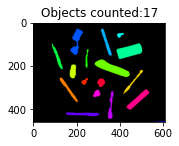

In [18]:
count_object(img_erode1)

objects number is: 9


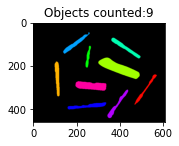

In [19]:
count_object(img_erode2)

objects number is: 11


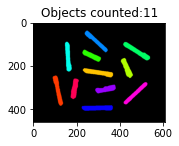

In [20]:
count_object(img_erode3)

objects number is: 10


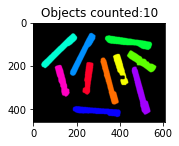

In [21]:
count_object(img_erode4)